In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df_credit = pd.read_csv('fraud_risk_dataset.csv', header=0,index_col=0)
df_credit.head()

,portfolio_id,product_term_credit_limit,NP,cash_intent,ALJ0300,ALJ0316,ALJ0416,ALJ5030,ALJ5320,ALJ5730,...,TSTU0910,TSTU2906,TSTU2907,TSTU2908,TSTU3906,TSTU3907,TSTU3908,TSTU4906,TSTU4907,TSTU4908
record_nb,,,,,,,,,,,,,,,,,,,,,
1,1908,500,0,0,2,1,1,33521,50283,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1908,500,0,0,0,98,98,999999998,999999998,999999998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
3,1908,500,0,0,1,0,0,999999997,999999997,999999997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1908,500,0,0,0,98,98,999999998,999999998,999999998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
5,1908,500,0,1,2,0,0,999999997,999999997,999999997,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0


In [3]:
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19030 entries, 1 to 19030
Columns: 2329 entries, portfolio_id to TSTU4908
dtypes: float64(836), int64(1493)
memory usage: 338.3 MB
None


In [4]:
print(df_credit.nunique())

portfolio_id                 17
product_term_credit_limit     4
NP                            2
cash_intent                   2
ALJ0300                      30
                             ..
TSTU3907                     12
TSTU3908                     12
TSTU4906                      6
TSTU4907                     20
TSTU4908                     20
Length: 2329, dtype: int64


In [18]:
df_credit.shape

(19030, 2329)

In [19]:
df_numeric = df_credit.drop(['portfolio_id', "product_term_credit_limit","cash_intent" ], axis = 1)

In [56]:
df_new = df_numeric.dropna()

In [57]:
df_new.head()

,NP,ALJ0300,ALJ0316,ALJ0416,ALJ5030,ALJ5320,ALJ5730,ALJ5820,ALJ5830,ALJ8120,...,TSTU0910,TSTU2906,TSTU2907,TSTU2908,TSTU3906,TSTU3907,TSTU3908,TSTU4906,TSTU4907,TSTU4908
record_nb,,,,,,,,,,,,,,,,,,,,,
1,0,2,1,1,33521,50283,0,698,698,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,98,98,999999998,999999998,999999998,999999998,999999998,9998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
3,0,1,0,0,999999997,999999997,999999997,999999997,999999997,89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,98,98,999999998,999999998,999999998,999999998,999999998,9998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
5,0,2,0,0,999999997,999999997,999999997,999999997,999999997,65,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0


In [59]:
df_new.shape

(19028, 2326)

## The first method

#### Firstly, use correlation matix to drop those variables with correlation greater than 0.9. There are 1881 features with correlation greater than 0.9. Then we reduce features from 2326 to 445. 

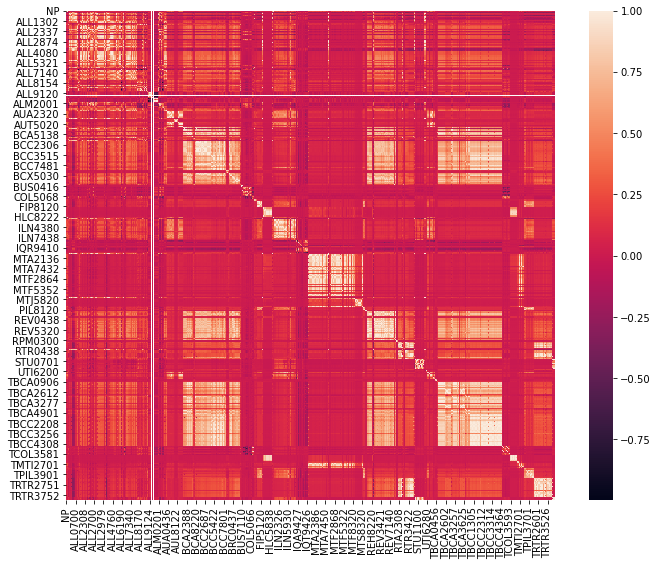

In [268]:
import seaborn as sns
#correlation matrix
corrval_all = df_new.corr()
visual = plt.figure(figsize = (12,9))

sns.heatmap(corrval_all,  vmax = 1, square = True)
plt.savefig("reduced_corr_graph.png")

In [269]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [271]:
corr_features_all = correlation(df_new, 0.90)
len(set(corr_features_all))

1881

In [273]:
#corr_features_all

In [276]:
df_after_correlation_matrix = df_new.drop(corr_features_all, axis = 1)
df_after_correlation_matrix.shape

(19028, 445)

#### we continue on reducing features using F-value and p-value.

In [284]:
df_after_correlation_matrix.head(5)

,NP,ALJ0300,ALJ0316,ALJ5030,ALL0000,ALL0060,ALL0061,ALL0201,ALL0216,ALL0316,...,TPIL3901,TPIL4709,TPIL4901,TRTR1203,TRTR2203,TRTR3203,TRTR3401,TRTR3403,TRTR4203,TSTU0909
record_nb,,,,,,,,,,,,,,,,,,,,,
1,0,2,1,33521,13,96,96,0,7,7,...,0.0,97.0,0.0,520.0,199.0,-562.0,8.0,5.0,-2239.0,95.0
2,0,0,98,999999998,21,2,7,0,11,7,...,0.0,97.0,0.0,999999997.0,999999997.0,999999997.0,97.0,97.0,999999997.0,98.0
3,0,1,0,999999997,32,3,25,0,26,24,...,97.0,97.0,97.0,-104.0,-389.0,293.0,96.0,8.0,1428.0,95.0
4,0,0,98,999999998,39,0,0,0,0,0,...,97.0,97.0,0.0,999999997.0,999999997.0,999999997.0,97.0,97.0,999999997.0,98.0
5,0,2,0,999999997,7,1,1,0,1,1,...,98.0,98.0,98.0,999999998.0,999999998.0,999999998.0,98.0,98.0,999999998.0,98.0


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression

In [278]:
dataset_445 = df_after_correlation_matrix.values

In [279]:
X = dataset_445[:, 1:]
y = dataset_445[:,0]

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [281]:
f_values, p_values = f_regression(X, y)

D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [283]:
print(len(f_values))
print(len(p_values))

444
444


In [285]:
feature_names_445 = np.array(df_after_correlation_matrix.drop(["NP"], axis = 1).columns)

In [287]:
feature_names_445

444

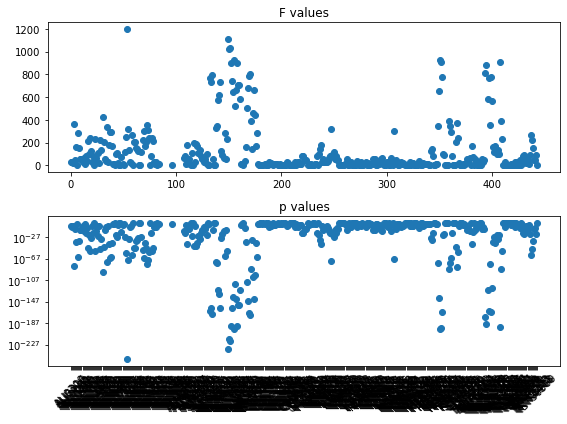

In [288]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(8,6))
ax[0].set_title("F values")
ax[0].plot(f_values, 'o')
ax[1].set_title("p values")
ax[1].plot(p_values, 'o')
ax[1].set_yscale("log")

ax[1].set_xticks(range(X.shape[1]))
ax[1].set_xticklabels(feature_names_445, rotation=45);
fig.tight_layout()

#### Build a new DataFrame, columns: features, f_value, and p_value for the 444 features

In [289]:
df_features_444 = pd.DataFrame(data = feature_names_445, columns = ["Features"])

In [290]:
df_features_444["f_value"] = f_values
df_features_444 ["p_value"] = p_values

In [291]:
df_features_444

,Features,f_value,p_value
0,ALJ0300,25.645615,4.140587e-07
1,ALJ0316,33.279913,8.104115e-09
2,ALJ5030,20.874491,4.934613e-06
3,ALL0000,367.047018,4.768321e-81
4,ALL0060,51.516036,7.362879e-13
...,...,...,...
439,TRTR3203,150.814302,1.555247e-34
440,TRTR3401,46.635067,8.809790e-12
441,TRTR3403,44.610146,2.470891e-11
442,TRTR4203,95.385491,1.769668e-22


##### Visualize the 444 features' f_value and p_value, and looking for those with high f_value and low_p_value

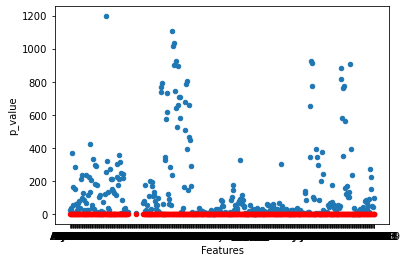

In [295]:
ax = plt.gca()

df_features_444.plot(kind='scatter',x='Features',y='f_value',ax=ax)
df_features_444.plot(kind='scatter',x='Features',y='p_value', color='red', ax=ax)
#plt.yscale('log')
#plt.ylim(1e-10,2e3)
plt.show()

#### select top 15% features with highest f_value, and with the lowest p_value. Finally, we got 64 features.

In [372]:
df_selected_features_from444 = df_features_444[(df_features_444['f_value'] >= df_features_444.f_value.quantile(0.85)) & (df_features_444['p_value'] <= df_features_444.p_value.quantile(0.15))]

In [373]:
len(df_selected_features_from444)

64

In [374]:
df_selected_features_from444

,Features,f_value,p_value
3,ALL0000,367.047018,4.768321e-81
7,ALL0216,286.200447,9.783524e-64
30,ALL5020,420.532077,1.866130e-92
34,ALL6120,333.827221,6.047880e-74
37,ALL6210,296.712633,5.427275e-66
...,...,...,...
399,TBCA2601,772.451521,1.111570e-166
400,TBCA2606,562.735979,1.282431e-122
408,TBCC1203,908.800610,4.540283e-195
409,TBCC3203,392.608306,1.667959e-86


#### visualize the f_values of the 64 features

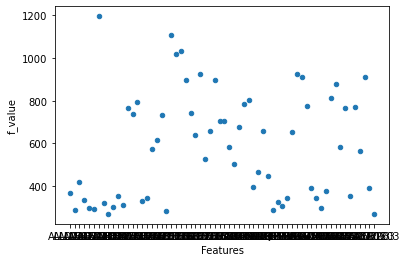

In [375]:
ax = plt.gca()
df_selected_features_from444.plot(kind='scatter',x='Features',y='f_value',ax=ax)
plt.show()

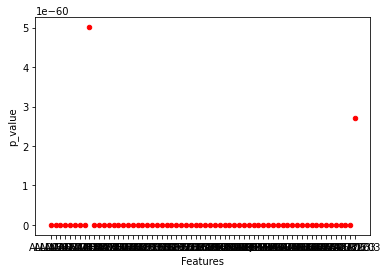

In [376]:
ax = plt.gca()

#df_selected_features.plot(kind='line',x='Features',y='f_value',ax=ax)
df_selected_features_from444.plot(kind='scatter',x='Features',y='p_value', color='red', ax=ax)
#plt.yscale('log')
plt.show()

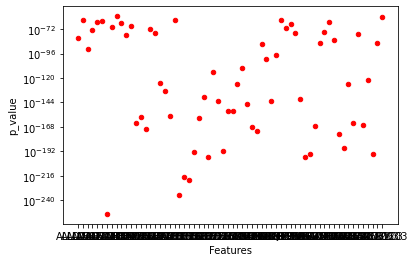

In [301]:
ax = plt.gca()

#df_selected_features.plot(kind='line',x='Features',y='f_value',ax=ax)
df_selected_features_from444.plot(kind='scatter',x='Features',y='p_value', color='red', ax=ax)
plt.yscale('log')
plt.show()

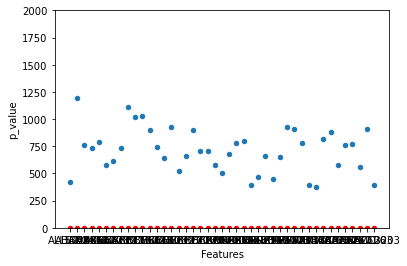

In [313]:
ax = plt.gca()

df_selected_features_from444.plot(kind='scatter',x='Features',y='f_value',ax=ax)
df_selected_features_from444.plot(kind='scatter',x='Features',y='p_value', color='red', ax=ax)
#plt.yscale('log')
plt.ylim(1e-10,2e3)
plt.show()

#### visualize the p_values of the 64 features, we found that there are some outliers, and we continue on dropping these outlier features.

##### Ranking p_value in decending order, and drop the top features to decrease the number of outliers.

In [302]:
df_selected_features_from444.sort_values(by='p_value', ascending=False).head(50)

,Features,f_value,p_value
58,ALL8110,268.931557,5.008317e-60
437,TRTR1203,270.173490,2.708930e-60
146,BCA8155,284.502961,2.264210e-63
7,ALL0216,286.200447,9.783524e-64
177,BRC8158,288.186409,3.666003e-64
38,ALL6220,289.756664,1.687188e-64
361,RTA5030,296.207167,6.966593e-66
37,ALL6210,296.712633,5.427275e-66
69,ALL8172,299.261910,1.540753e-66
307,IQT9846,304.872119,9.651323e-68
